In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
from sklearn.model_selection import train_test_split
from torch.utils.data import  DataLoader
import torch.nn as nn
from PIL import Image
from sklearn.manifold import TSNE
import umap
from torchinfo import summary
import zipfile
import sys

sys.path.append('/content/drive/MyDrive')
from constants import *
from models import CaloriesCNN, CaloriesResNet, ImgDataset
from data import create_dataloaders
from training import fit, test, embeds

In [5]:
with zipfile.ZipFile('/content/drive/MyDrive/pictures.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/images')

# датасет состоит из картинок еды
# целевая переменная - количество килокалорий на 100г

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df

,img_path,kkal
0,/content/drive/MyDrive/Colab_Notebooks/picture...,117
1,/content/drive/MyDrive/Colab_Notebooks/picture...,32
2,/content/drive/MyDrive/Colab_Notebooks/picture...,120
3,/content/drive/MyDrive/Colab_Notebooks/picture...,222
4,/content/drive/MyDrive/Colab_Notebooks/picture...,109
...,...,...
6171,/content/drive/MyDrive/Colab_Notebooks/picture...,245
6172,/content/drive/MyDrive/Colab_Notebooks/picture...,137
6173,/content/drive/MyDrive/Colab_Notebooks/picture...,145
6174,/content/drive/MyDrive/Colab_Notebooks/picture...,303


## переместил картинки в другую папку чтобы быстрее загружались

In [7]:
df['img_path'] = df['img_path'].str.replace(
    "/content/drive/MyDrive/Colab_Notebooks/pictures",
    "/content/images/pictures"
)

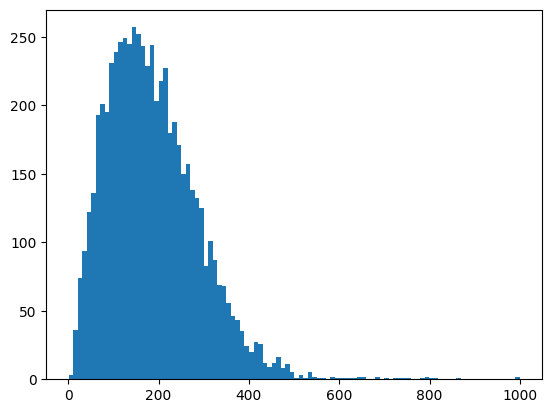

In [8]:
plt.hist(df['kkal'], bins=100)
plt.show()

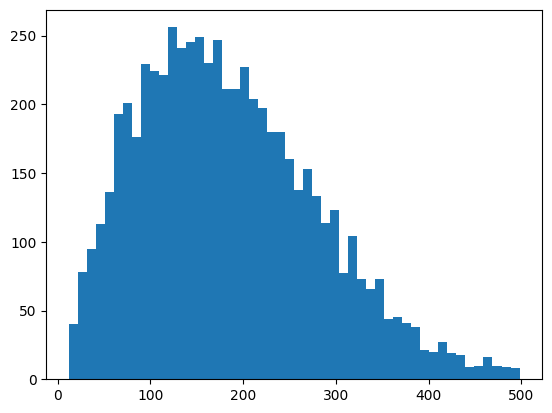

In [9]:
df = df[(df['kkal'] < 500) & (df['kkal'] > 10)]
plt.hist(df['kkal'], bins=50)
plt.show()

In [10]:
X_train, X_tmp, y_train, y_tmp = train_test_split(df['img_path'], df['kkal'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

In [11]:
train_transforms = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])
test_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])

dataloaders = create_dataloaders(X_train.values, y_train.values, train_transforms, test_transforms,
                                 X_test.values, y_test.values,
                                 X_val.values, y_val.values,
                                 batch_size=64)

In [ ]:
model = CaloriesCNN()
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.3,
    patience=3,
)

train_losses, val_losses, train_mae, val_mae = fit(model, criterion, optimizer, scheduler, dataloaders, epoches=20)


Epoch 1/20


100%|██████████| 68/68 [00:50<00:00,  1.35it/s]


train Loss: 78.4207 | MAE: 78.92 kcal


100%|██████████| 15/15 [00:04<00:00,  3.45it/s]


val Loss: 72.6155 | MAE: 73.12 kcal

Epoch 2/20


100%|██████████| 68/68 [00:51<00:00,  1.33it/s]


train Loss: 73.6447 | MAE: 74.14 kcal


100%|██████████| 15/15 [00:04<00:00,  3.38it/s]


val Loss: 69.7573 | MAE: 70.26 kcal

Epoch 3/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 71.8017 | MAE: 72.30 kcal


100%|██████████| 15/15 [00:04<00:00,  3.61it/s]


val Loss: 71.1492 | MAE: 71.65 kcal

Epoch 4/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 72.7716 | MAE: 73.27 kcal


100%|██████████| 15/15 [00:04<00:00,  3.41it/s]


val Loss: 77.5437 | MAE: 78.04 kcal

Epoch 5/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 72.6428 | MAE: 73.14 kcal


100%|██████████| 15/15 [00:04<00:00,  3.57it/s]


val Loss: 74.7890 | MAE: 75.29 kcal

Epoch 6/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 71.1308 | MAE: 71.63 kcal


100%|██████████| 15/15 [00:03<00:00,  3.94it/s]


val Loss: 72.0283 | MAE: 72.53 kcal

Epoch 7/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 69.4390 | MAE: 69.94 kcal


100%|██████████| 15/15 [00:03<00:00,  4.01it/s]


val Loss: 67.9635 | MAE: 68.46 kcal

Epoch 8/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 68.9217 | MAE: 69.42 kcal


100%|██████████| 15/15 [00:03<00:00,  4.01it/s]


val Loss: 66.6096 | MAE: 67.11 kcal

Epoch 9/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 68.6236 | MAE: 69.12 kcal


100%|██████████| 15/15 [00:03<00:00,  3.95it/s]


val Loss: 66.8659 | MAE: 67.36 kcal

Epoch 10/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 68.5994 | MAE: 69.10 kcal


100%|██████████| 15/15 [00:03<00:00,  4.02it/s]


val Loss: 67.8718 | MAE: 68.37 kcal

Epoch 11/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 68.5928 | MAE: 69.09 kcal


100%|██████████| 15/15 [00:03<00:00,  4.02it/s]


val Loss: 67.2634 | MAE: 67.76 kcal

Epoch 12/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 68.9587 | MAE: 69.46 kcal


100%|██████████| 15/15 [00:03<00:00,  3.94it/s]


val Loss: 66.7911 | MAE: 67.29 kcal

Epoch 13/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 68.6597 | MAE: 69.16 kcal


100%|██████████| 15/15 [00:03<00:00,  4.00it/s]


val Loss: 65.7958 | MAE: 66.29 kcal

Epoch 14/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 67.6322 | MAE: 68.13 kcal


100%|██████████| 15/15 [00:03<00:00,  3.94it/s]


val Loss: 65.4583 | MAE: 65.96 kcal

Epoch 15/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 67.8916 | MAE: 68.39 kcal


100%|██████████| 15/15 [00:03<00:00,  4.03it/s]


val Loss: 65.7172 | MAE: 66.22 kcal

Epoch 16/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 67.2834 | MAE: 67.78 kcal


100%|██████████| 15/15 [00:03<00:00,  3.94it/s]


val Loss: 65.7132 | MAE: 66.21 kcal

Epoch 17/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 67.4267 | MAE: 67.92 kcal


100%|██████████| 15/15 [00:03<00:00,  3.96it/s]


val Loss: 65.3673 | MAE: 65.86 kcal

Epoch 18/20


100%|██████████| 68/68 [00:50<00:00,  1.33it/s]


train Loss: 67.8851 | MAE: 68.38 kcal


100%|██████████| 15/15 [00:03<00:00,  4.00it/s]


val Loss: 65.6507 | MAE: 66.15 kcal

Epoch 19/20


100%|██████████| 68/68 [00:50<00:00,  1.34it/s]


train Loss: 67.1976 | MAE: 67.70 kcal


100%|██████████| 15/15 [00:03<00:00,  3.88it/s]


val Loss: 66.0312 | MAE: 66.53 kcal

Epoch 20/20


100%|██████████| 68/68 [00:51<00:00,  1.33it/s]


train Loss: 67.3896 | MAE: 67.89 kcal


100%|██████████| 15/15 [00:03<00:00,  3.88it/s]

val Loss: 65.4783 | MAE: 65.98 kcal


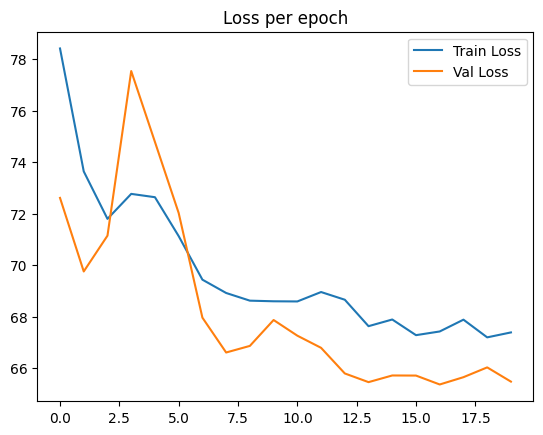

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss per epoch')
plt.show()

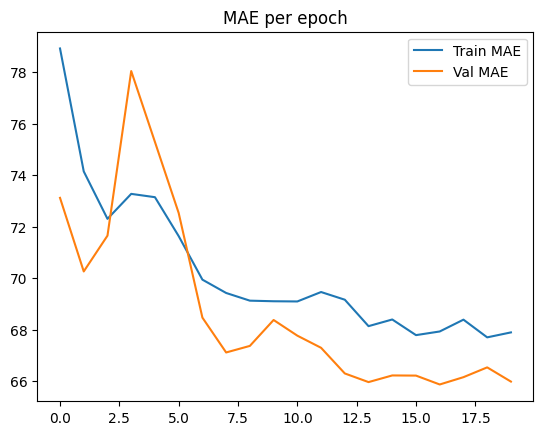

In [ ]:
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.legend()
plt.title('MAE per epoch')
plt.show()

In [ ]:
test(model, criterion, dataloaders)

TEST Loss: 65.06 | TEST MAE: 65.56 kcal


# эмбеддинги картинок

In [ ]:
device = 'cuda'
embed_ds = ImgDataset(df['img_path'].values, df['kkal'].values, test_transforms)
embed_loader = DataLoader(embed_ds, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

all_embeds, all_targets = embeds(model, embed_loader)

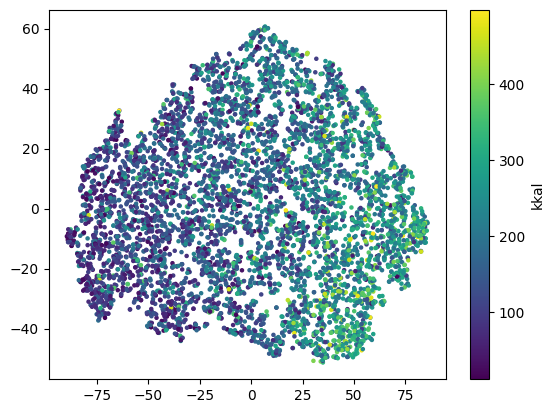

In [ ]:
points = TSNE(n_components=2, random_state=42).fit_transform(all_embeds)

plt.scatter(points[:, 0], points[:, 1], c=all_targets, cmap='viridis', s=5)
plt.colorbar(label='kkal')
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


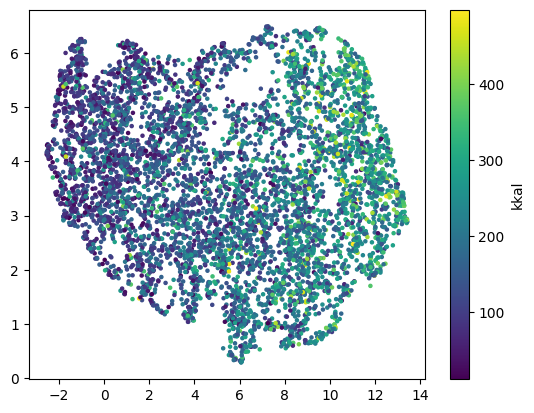

In [ ]:
points = umap.UMAP(n_components=2, random_state=42).fit_transform(all_embeds)

plt.scatter(points[:, 0], points[:, 1], c=all_targets, cmap='viridis', s=5)
plt.colorbar(label='kkal')
plt.show()

# transfer learning

In [12]:
train_transforms = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
val_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
dataloaders = create_dataloaders(X_train.values, y_train.values, train_transforms, val_transforms,
                   X_test.values, y_test.values, X_val.values, y_val.values, batch_size=512)

In [18]:
model = CaloriesResNet(freeze_backbone=True)
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=1e-3,
    weight_decay=1e-4,
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.3,
    patience=3,
)

train_losses, val_losses, train_mae, val_mae = fit(model, criterion, optimizer, scheduler, dataloaders, epoches=20)


Epoch 1/20


100%|██████████| 9/9 [00:22<00:00,  2.53s/it]


train Loss: 180.2647 | MAE: 180.76 kcal


100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


val Loss: 170.6967 | MAE: 171.20 kcal

Epoch 2/20


100%|██████████| 9/9 [00:24<00:00,  2.74s/it]


train Loss: 153.1601 | MAE: 153.66 kcal


100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


val Loss: 125.5280 | MAE: 126.03 kcal

Epoch 3/20


100%|██████████| 9/9 [00:24<00:00,  2.73s/it]


train Loss: 99.9002 | MAE: 100.40 kcal


100%|██████████| 2/2 [00:06<00:00,  3.14s/it]


val Loss: 76.8801 | MAE: 77.38 kcal

Epoch 4/20


100%|██████████| 9/9 [00:24<00:00,  2.67s/it]


train Loss: 81.4544 | MAE: 81.95 kcal


100%|██████████| 2/2 [00:06<00:00,  3.11s/it]


val Loss: 81.4657 | MAE: 81.96 kcal

Epoch 5/20


100%|██████████| 9/9 [00:25<00:00,  2.81s/it]


train Loss: 79.5709 | MAE: 80.07 kcal


100%|██████████| 2/2 [00:06<00:00,  3.28s/it]


val Loss: 76.0707 | MAE: 76.57 kcal

Epoch 6/20


100%|██████████| 9/9 [00:26<00:00,  2.89s/it]


train Loss: 77.5633 | MAE: 78.06 kcal


100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 76.4164 | MAE: 76.92 kcal

Epoch 7/20


100%|██████████| 9/9 [00:24<00:00,  2.75s/it]


train Loss: 75.7579 | MAE: 76.26 kcal


100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


val Loss: 74.4611 | MAE: 74.96 kcal

Epoch 8/20


100%|██████████| 9/9 [00:24<00:00,  2.71s/it]


train Loss: 75.3499 | MAE: 75.85 kcal


100%|██████████| 2/2 [00:06<00:00,  3.12s/it]


val Loss: 73.7774 | MAE: 74.28 kcal

Epoch 9/20


100%|██████████| 9/9 [00:24<00:00,  2.73s/it]


train Loss: 74.7024 | MAE: 75.20 kcal


100%|██████████| 2/2 [00:06<00:00,  3.18s/it]


val Loss: 73.2797 | MAE: 73.78 kcal

Epoch 10/20


100%|██████████| 9/9 [00:26<00:00,  2.90s/it]


train Loss: 73.9789 | MAE: 74.48 kcal


100%|██████████| 2/2 [00:06<00:00,  3.17s/it]


val Loss: 72.3547 | MAE: 72.85 kcal

Epoch 11/20


100%|██████████| 9/9 [00:25<00:00,  2.79s/it]


train Loss: 73.0991 | MAE: 73.60 kcal


100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


val Loss: 71.5449 | MAE: 72.04 kcal

Epoch 12/20


100%|██████████| 9/9 [00:24<00:00,  2.75s/it]


train Loss: 71.6803 | MAE: 72.18 kcal


100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


val Loss: 70.7033 | MAE: 71.20 kcal

Epoch 13/20


100%|██████████| 9/9 [00:24<00:00,  2.70s/it]


train Loss: 71.5357 | MAE: 72.03 kcal


100%|██████████| 2/2 [00:06<00:00,  3.31s/it]


val Loss: 69.8296 | MAE: 70.33 kcal

Epoch 14/20


100%|██████████| 9/9 [00:25<00:00,  2.80s/it]


train Loss: 70.3301 | MAE: 70.83 kcal


100%|██████████| 2/2 [00:06<00:00,  3.32s/it]


val Loss: 68.8715 | MAE: 69.37 kcal

Epoch 15/20


100%|██████████| 9/9 [00:24<00:00,  2.77s/it]


train Loss: 69.4700 | MAE: 69.97 kcal


100%|██████████| 2/2 [00:07<00:00,  3.75s/it]


val Loss: 67.8906 | MAE: 68.39 kcal

Epoch 16/20


100%|██████████| 9/9 [00:23<00:00,  2.63s/it]


train Loss: 68.3684 | MAE: 68.87 kcal


100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


val Loss: 66.9414 | MAE: 67.44 kcal

Epoch 17/20


100%|██████████| 9/9 [00:23<00:00,  2.63s/it]


train Loss: 67.4893 | MAE: 67.99 kcal


100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


val Loss: 65.8945 | MAE: 66.39 kcal

Epoch 18/20


100%|██████████| 9/9 [00:25<00:00,  2.82s/it]


train Loss: 66.5716 | MAE: 67.07 kcal


100%|██████████| 2/2 [00:06<00:00,  3.29s/it]


val Loss: 65.0123 | MAE: 65.51 kcal

Epoch 19/20


100%|██████████| 9/9 [00:25<00:00,  2.88s/it]


train Loss: 65.9809 | MAE: 66.48 kcal


100%|██████████| 2/2 [00:07<00:00,  3.63s/it]


val Loss: 64.1984 | MAE: 64.70 kcal

Epoch 20/20


100%|██████████| 9/9 [00:24<00:00,  2.69s/it]


train Loss: 65.1108 | MAE: 65.61 kcal


100%|██████████| 2/2 [00:07<00:00,  3.91s/it]

val Loss: 63.5949 | MAE: 64.09 kcal


тут решил попробовать еще 10 эпох прогнать

In [19]:
train_losses1, val_losses1, train_mae1, val_mae1 = fit(model, criterion, optimizer, scheduler, dataloaders, epoches=10)
train_losses.append(train_losses1)
val_losses.append(val_losses1)
train_mae.append(train_mae1)
val_mae.append(val_mae1)


Epoch 21/30


100%|██████████| 9/9 [00:37<00:00,  4.20s/it]


train Loss: 64.5964 | MAE: 65.09 kcal


100%|██████████| 2/2 [00:13<00:00,  6.58s/it]


val Loss: 63.0935 | MAE: 63.59 kcal

Epoch 22/30


100%|██████████| 9/9 [00:36<00:00,  4.05s/it]


train Loss: 64.1425 | MAE: 64.64 kcal


100%|██████████| 2/2 [00:07<00:00,  3.75s/it]


val Loss: 62.7021 | MAE: 63.20 kcal

Epoch 23/30


100%|██████████| 9/9 [00:25<00:00,  2.80s/it]


train Loss: 63.4783 | MAE: 63.98 kcal


100%|██████████| 2/2 [00:06<00:00,  3.14s/it]


val Loss: 62.4318 | MAE: 62.93 kcal

Epoch 24/30


100%|██████████| 9/9 [00:26<00:00,  2.92s/it]


train Loss: 62.9896 | MAE: 63.49 kcal


100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


val Loss: 62.0860 | MAE: 62.58 kcal

Epoch 25/30


100%|██████████| 9/9 [00:24<00:00,  2.71s/it]


train Loss: 62.9604 | MAE: 63.46 kcal


100%|██████████| 2/2 [00:07<00:00,  3.82s/it]


val Loss: 61.8698 | MAE: 62.37 kcal

Epoch 26/30


100%|██████████| 9/9 [00:25<00:00,  2.89s/it]


train Loss: 62.8972 | MAE: 63.40 kcal


100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 61.7015 | MAE: 62.20 kcal

Epoch 27/30


100%|██████████| 9/9 [00:26<00:00,  2.95s/it]


train Loss: 62.4679 | MAE: 62.97 kcal


100%|██████████| 2/2 [00:06<00:00,  3.20s/it]


val Loss: 61.5651 | MAE: 62.06 kcal

Epoch 28/30


100%|██████████| 9/9 [00:25<00:00,  2.83s/it]


train Loss: 62.3073 | MAE: 62.81 kcal


100%|██████████| 2/2 [00:07<00:00,  3.86s/it]


val Loss: 61.4203 | MAE: 61.92 kcal

Epoch 29/30


100%|██████████| 9/9 [00:24<00:00,  2.68s/it]


train Loss: 62.0502 | MAE: 62.55 kcal


100%|██████████| 2/2 [00:06<00:00,  3.48s/it]


val Loss: 61.2416 | MAE: 61.74 kcal

Epoch 30/30


100%|██████████| 9/9 [00:24<00:00,  2.71s/it]


train Loss: 61.3840 | MAE: 61.88 kcal


100%|██████████| 2/2 [00:06<00:00,  3.10s/it]


val Loss: 61.0701 | MAE: 61.57 kcal

Epoch 31/30


100%|██████████| 9/9 [00:24<00:00,  2.75s/it]


train Loss: 61.3023 | MAE: 61.80 kcal


100%|██████████| 2/2 [00:06<00:00,  3.19s/it]

val Loss: 61.0180 | MAE: 61.52 kcal


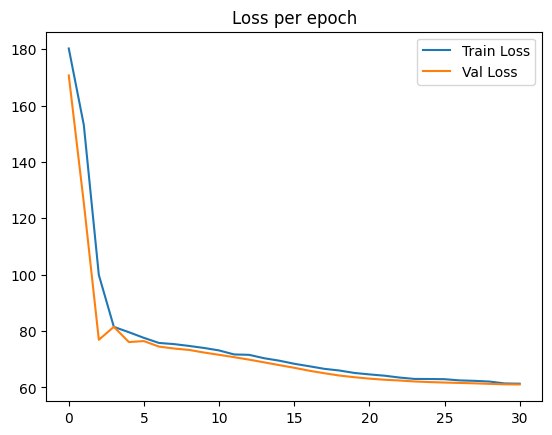

In [20]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss per epoch')
plt.show()


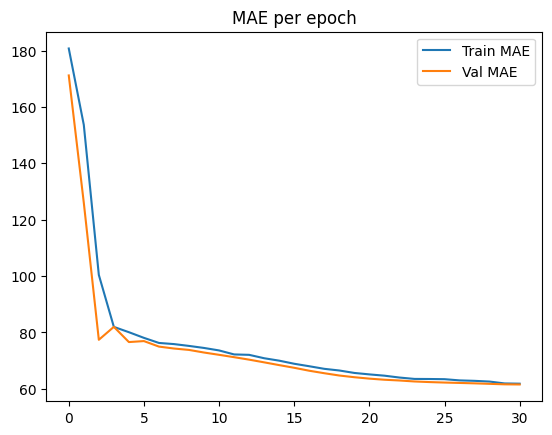

In [21]:
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.legend()
plt.title('MAE per epoch')
plt.show()

In [22]:
test(model, criterion, dataloaders)

TEST Loss: 60.68 | TEST MAE: 61.18 kcal


# Сравнение моделей
моя:
- train MAE(20 эпох) = 67.89 kcal
- test MAE(20 эпох) =  65.56 kcal

ResNet:
- train MAE(20 эпох) = 65.61 kcal
- train MAE(30 эпох) = 61.80 kcal
- test MAE(30 эпох) =  61.18 kcal

## также модель ResNet обучается намного быстрее т.к. можно задать размер батча больше

In [41]:
mod = CaloriesResNet(freeze_backbone=True).to(device)

summary(model=mod, input_size=(32, 3, 384, 288), col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
CaloriesResNet (CaloriesResNet)               [32, 3, 384, 288]    [32, 1]              --                   Partial
├─ResNet (backbone)                           [32, 3, 384, 288]    [32, 512]            --                   False
│    └─Conv2d (conv1)                         [32, 3, 384, 288]    [32, 64, 192, 144]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 192, 144]   [32, 64, 192, 144]   (128)                False
│    └─ReLU (relu)                            [32, 64, 192, 144]   [32, 64, 192, 144]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 192, 144]   [32, 64, 96, 72]     --                   --
│    └─Sequential (layer1)                    [32, 64, 96, 72]     [32, 64, 96, 72]     --                   False
│    │    └─BasicBlock (0)                    [32, 64, 96, 72]     [32, 64, 96, 

In [25]:
mod = CaloriesCNN().to(device)
summary(model=mod, input_size=(32, 3, 384, 288), col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CaloriesCNN (CaloriesCNN)                [32, 3, 384, 288]    [32, 1]              --                   True
├─Sequential (features)                  [32, 3, 384, 288]    [32, 256, 7, 7]      --                   True
│    └─Sequential (0)                    [32, 3, 384, 288]    [32, 32, 192, 144]   --                   True
│    │    └─Conv2d (0)                   [32, 3, 384, 288]    [32, 32, 384, 288]   896                  True
│    │    └─BatchNorm2d (1)              [32, 32, 384, 288]   [32, 32, 384, 288]   64                   True
│    │    └─ReLU (2)                     [32, 32, 384, 288]   [32, 32, 384, 288]   --                   --
│    │    └─Conv2d (3)                   [32, 32, 384, 288]   [32, 32, 384, 288]   9,248                True
│    │    └─BatchNorm2d (4)              [32, 32, 384, 288]   [32, 32, 384, 288]   64                   True
│    │    └─ReLU

# эмбеддинги картинок

In [27]:
embed_ds = ImgDataset(df['img_path'].values, df['kkal'].values, test_transforms)
embed_loader = DataLoader(embed_ds, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

all_embeds, all_targets = embeds(model, embed_loader)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


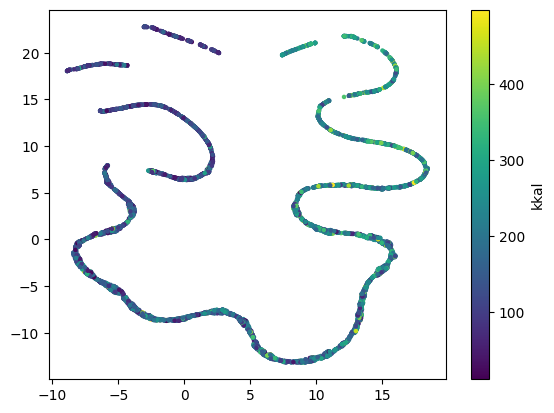

In [28]:
points = umap.UMAP(n_components=2, random_state=42).fit_transform(all_embeds)

plt.scatter(points[:, 0], points[:, 1], c=all_targets, cmap='viridis', s=5)
plt.colorbar(label='kkal')
plt.show()

# Тестик

In [29]:
img = Image.open("pizza.jpg")
img = img.resize((384, 288), Image.BILINEAR)
img.save("pizza_384x288.jpg")
img = Image.open("shava.jpeg")
img = img.resize((384, 288), Image.BILINEAR)
img.save("shava_384x288.jpg")

290 ккал

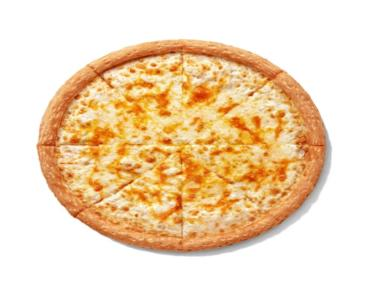

In [52]:
pizza = Image.open("/content/pizza_384x288.jpg")
pizza

??? ккал

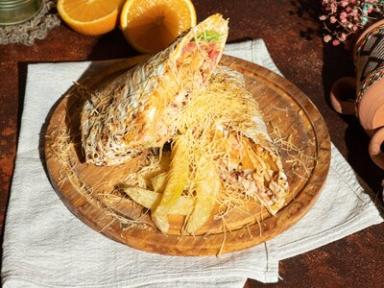

In [57]:
shava = Image.open("/content/shava_384x288.jpg")
shava

In [61]:
def prediction(img):
    model.eval()
    with torch.no_grad():
        x = val_transforms(img)
        x = x.unsqueeze(0)
        x = x.to(device)
        predict = model(x)
        return predict.item()

In [65]:
prediction(pizza), prediction(shava)

(225.5443115234375, 224.58453369140625)